In [2]:
import numpy as np
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import pandas as pd
from google.colab import drive


In [4]:
cd /

/


In [5]:
ls

bin@                        datalab/  lib@     media/                    proc/        sbin@  tools/
boot/                       dev/      lib32@   mnt/                      python-apt/  srv/   usr/
content/                    etc/      lib64@   NGC-DL-CONTAINER-LICENSE  root/        sys/   var/
cuda-keyring_1.0-1_all.deb  home/     libx32@  opt/                      run/         tmp/


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd content/drive/MyDrive/

/content/drive/MyDrive


In [14]:
data = pd.read_csv("Python Data/Diwali Sales Data.csv", encoding = 'unicode_escape')
#encoding parameter because of error

In [17]:
data.shape
#dimensions

(11251, 15)

In [18]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Start Data Cleaning

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [21]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [23]:
pd.isnull(data).sum()
#check for null

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [24]:
#amount column still has null, so we should replace these values with 'True'
data.dropna(inplace=True)

In [26]:
pd.isnull(data).sum()
#check again for null

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [30]:
#amount type should be int not float
data["Amount"] = data["Amount"].astype('int')

In [31]:
data["Amount"].dtypes

dtype('int64')

In [32]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [37]:
#rename the columns
data.rename(columns = {'Cust_name':'Customer_Name'})

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [38]:
data.rename(columns = {'Marital_Status':'Shaadi'})


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [41]:
#do describe for specific columns to gather values of numeric data
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Find Correlations Within Customer Data**

In [43]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

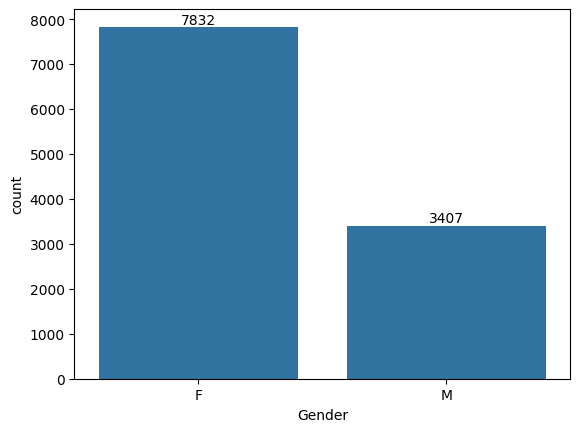

In [51]:
#Gender
a1 = sns.countplot(x = "Gender", data = data)
for bars in a1.containers:
  a1.bar_label(bars)

In [45]:
data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

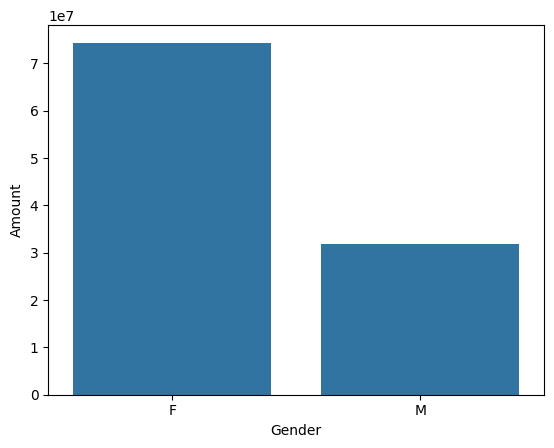

In [49]:
#put the above table in a graph for total amount and gender
sales_gen = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From these 2 graphs it is evident that most of the buyers are females and they purchase more in terms of good value.

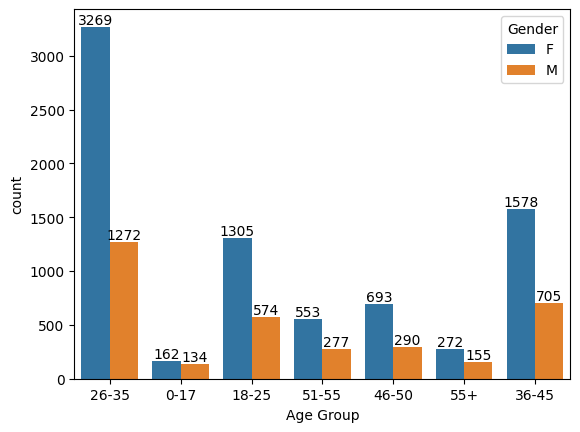

In [53]:
#Age
a2 = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')
for bars in a2.containers:
  a2.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

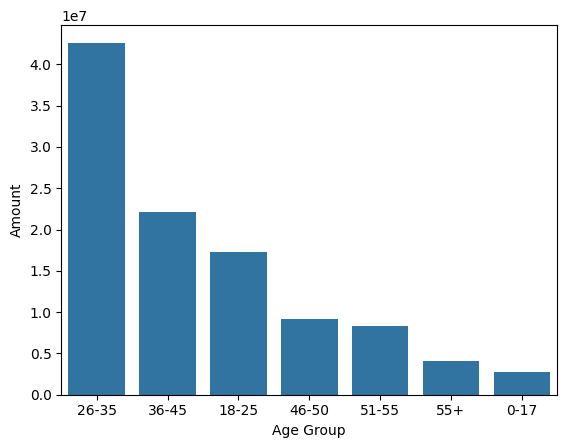

In [56]:
ageSales = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = ageSales)

<Axes: xlabel='State', ylabel='Amount'>

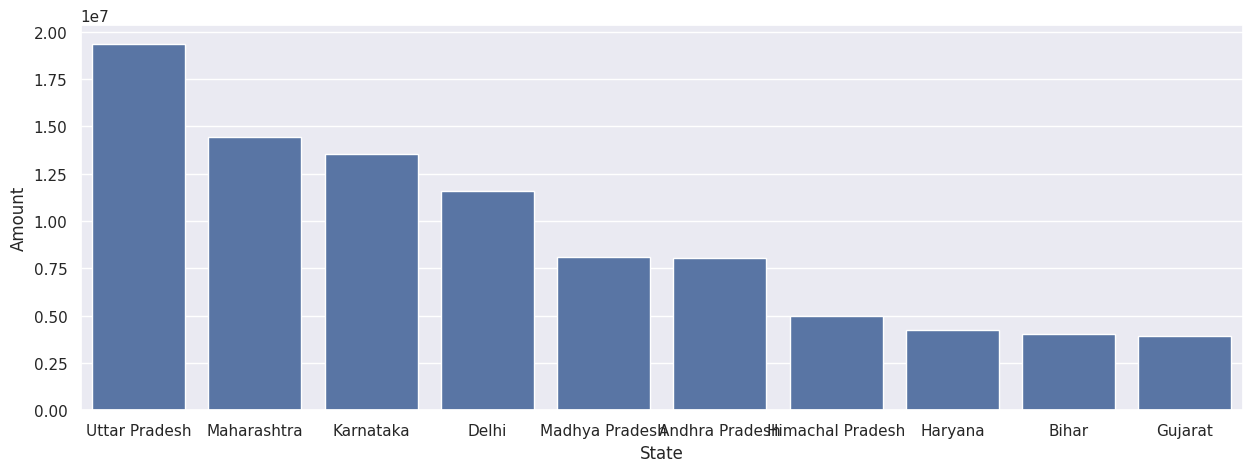

In [58]:
#State

#Find total sales per state
stateSales = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = stateSales, x = 'State',y= 'Amount')

It can be seen that Uttar Pradesh had the most sales revenue brought in.

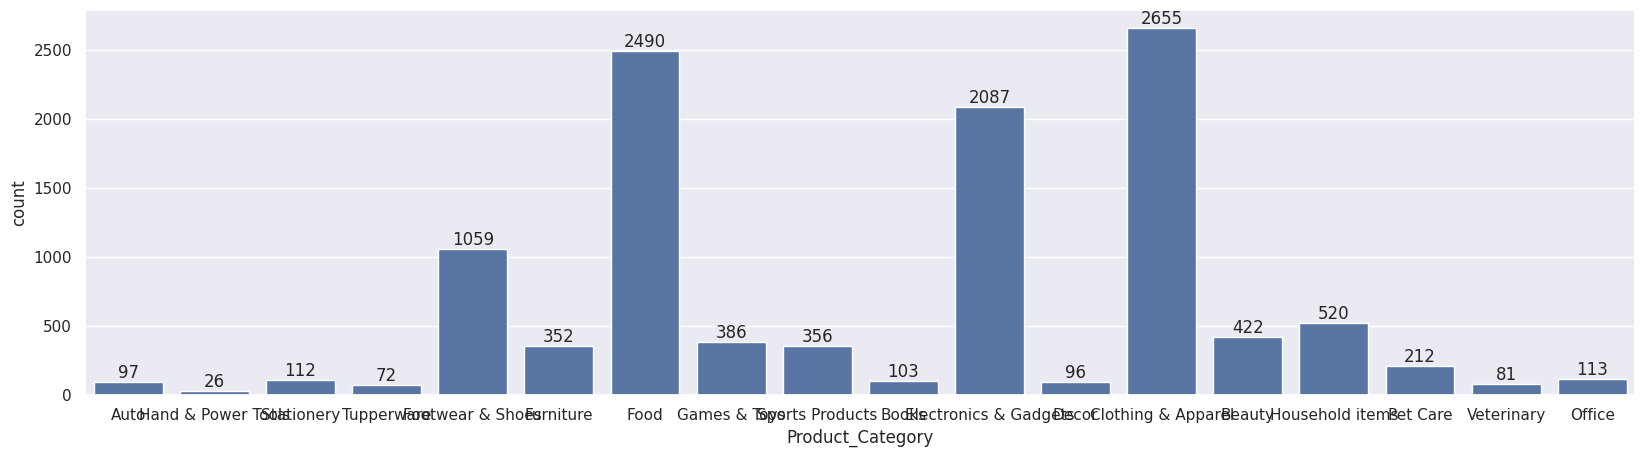

In [61]:
#Product
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

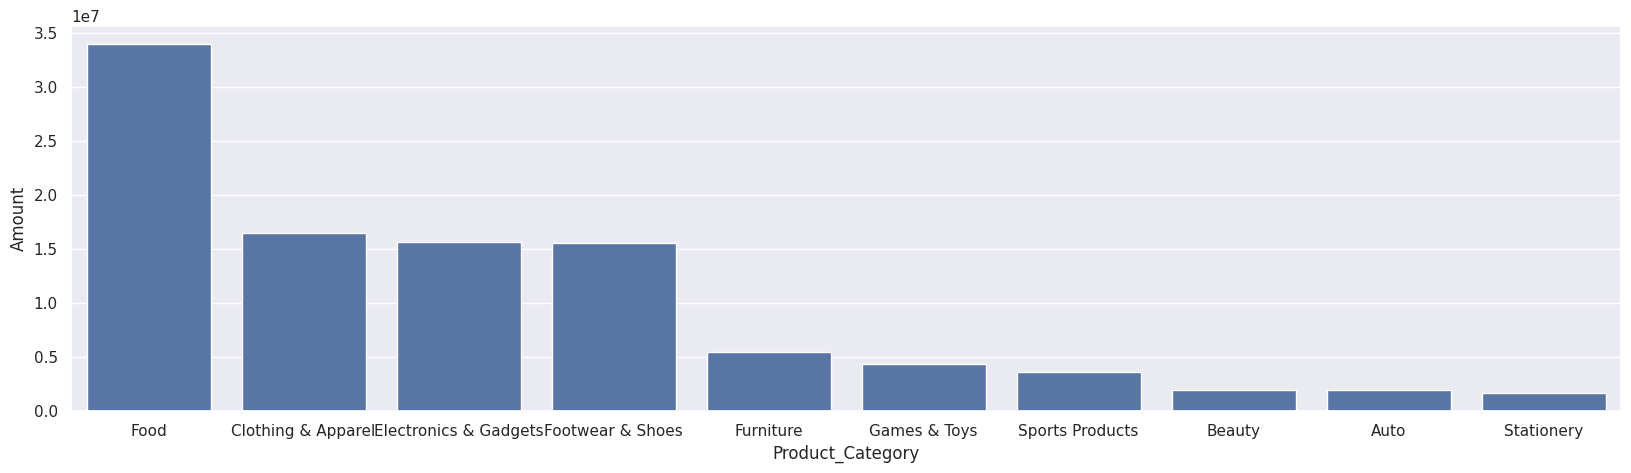

In [63]:
productSales = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = productSales, x = 'Product_Category',y= 'Amount')

Most sold products are food, clothing and apparel, electronics and gadgets.

<Axes: xlabel='Product_ID'>

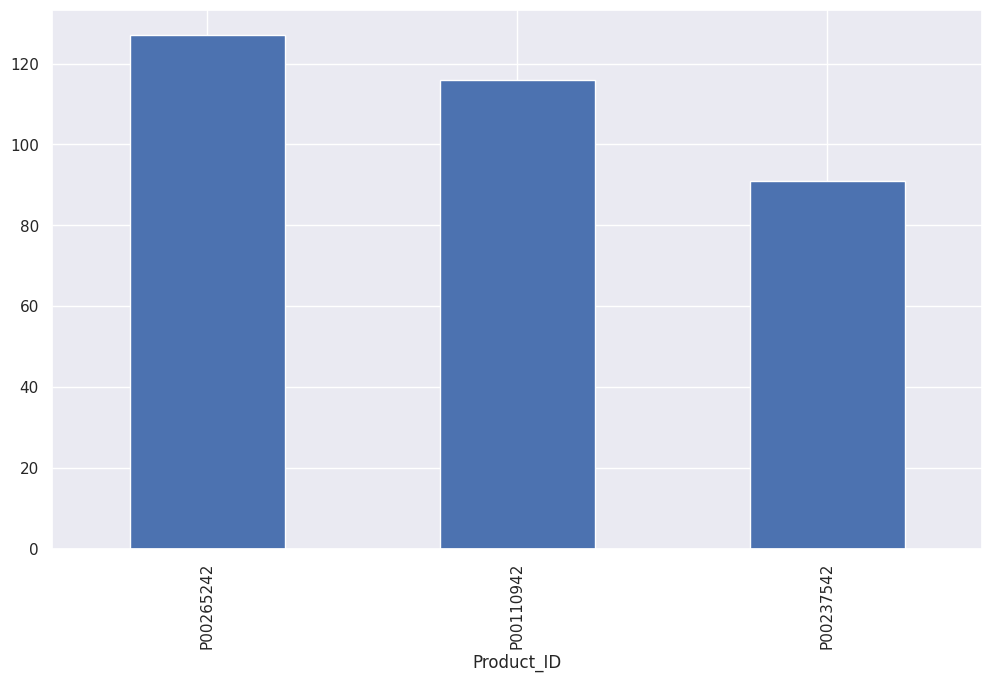

In [67]:
#Find Best Sellers

fig1, ax3 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(3).sort_values(ascending=False).plot(kind='bar')

# **Conclusions**

From all the data analysis done above, it can be seen that the women from Uttar Pradesh, Maharashtra, and Karnataka bring in the most sales by buying items from the food, slothing, and electronics departments.

It would be profitable for the business to invest more in these departments. The top 3 best performing items were IDs: P00265242, P00110942, P00237542.